# Análise de clientes academia Model Fitness - Modelo Machine Learning

Neste projeto desenvolvido no ambiente Jupyter, exploraremos a implementação de técnicas analíticas para identificar padrões de rotatividade entre os membros da academia. Utilizando dados históricos de frequência e comportamento dos clientes, bem como informações sobre renovação de contratos, poderemos criar modelos preditivos que auxiliem a prever a probabilidade de um cliente deixar de frequentar a academia. Isso permitirá que a Model Fitness tome ações proativas, como oferecer promoções personalizadas, criar programas de incentivo ou entrar em contato direto com os clientes em risco, buscando aumentar a retenção e, consequentemente, otimizar seus resultados.

Ao adotar essa abordagem orientada por dados, a Model Fitness demonstra seu compromisso em proporcionar uma experiência excepcional aos clientes, não apenas focando na aquisição, mas também na manutenção de um relacionamento duradouro. O uso das capacidades analíticas do Jupyter oferecerá as ferramentas necessárias para transformar dados em insights acionáveis, impulsionando a estratégia de interação com o cliente da academia e contribuindo para o seu sucesso contínuo.

# Introdução ao projeto


Problema da Rotatividade

A rotatividade de clientes, também conhecida como churn, é uma preocupação significativa para empresas em diversos setores, incluindo academias. Embora muitas vezes seja evidente quando um cliente deixa a academia, algumas saídas podem passar despercebidas. Para entender e prever essa rotatividade, é vital considerar diversos fatores que influenciam o comportamento do cliente, como sua interação com os serviços, engajamento e preferências.


Objetivos do Projeto

O principal objetivo deste projeto é utilizar análise de dados para prever a probabilidade de rotatividade de clientes na Model Fitness no próximo mês. Para isso, seguiremos as seguintes etapas:


**Passo 1: Preparação e Análise Exploratória dos Dados**

Carregaremos os dados fornecidos pela Model Fitness, que incluem informações sobre a rotatividade, características dos clientes e dados de frequência de uso.
Realizaremos uma análise exploratória dos dados para identificar tendências, características ausentes e calcular medidas estatísticas relevantes.
Compararemos as médias das características entre os grupos de clientes que saíram e os que permaneceram.


**Passo 2: Construção de Modelos Preditivos**

Dividiremos os dados em conjuntos de treinamento e validação.
Implementaremos dois modelos de classificação: regressão logística e floresta aleatória, para prever a rotatividade dos clientes.
Avaliaremos a acurácia, precisão e sensibilidade de ambos os modelos.


**Passo 3: Agrupamento de Clientes**

Realizaremos uma análise de clusterização para identificar grupos de clientes com características semelhantes.
Utilizaremos o algoritmo K-means para criar clusters e examinaremos as características médias de cada grupo.
Analisaremos as taxas de rotatividade em cada grupo, identificando quais são propensos a sair e quais são mais leais.


**Passo 4: Conclusões e Recomendações**

Com base nas análises realizadas, tiraremos conclusões sobre os fatores que mais influenciam a rotatividade de clientes.
Formularemos recomendações estratégicas para a Model Fitness com base nos insights obtidos, sugerindo medidas específicas para melhorar a retenção.
Forneceremos princípios essenciais e exemplos de implementação para orientar as estratégias de interação e retenção de clientes.

## Importação dos nossos dados e carregamento das bases

Iremos carregar as bibliotecas que iremos usar para gerar as análises e gráficos.

Iremos explicar cada um dos usos das bibliotecas:

* pandas --> análise de dados;
* numpy --> geração de gráficos e auxílio ao pandas;
* matplotlib.pyplot --> geração de gráficos 

Após isso iremos abrir nossos dados em diferentes seções e analisar a qualidade das bases e realizar as correções devidas em cada uma das seções como pré-análise de dados e processamento de base.

In [2]:
# Carregando nossas bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Base gym_churn_us.csv e carregamento de dados

Como observado anteriormente iremos abrir a base de dados **gym_churn_us.csv** realizando uma pré-análise de dados, processamento do dado e possível limpeza, indicando os erros e as mudanças

In [3]:
# abrindo a tabela gym_churn_us.csv

# Carregando dados no computador pessoal
try:
    df = pd.read_csv(r'/Downloads/gym_churn_us.csv')
    
# Carregando dados no JupyterHub
except:
    df = pd.read_csv(r'/datasets/gym_churn_us.csv')

In [4]:
# mostrando a df
df.head(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


In [5]:
# informações gerais da df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**Conclusão**

Não existem dados faltantes e oa organização dos dados parecem estar de acordo com o padrão. 

Os dados estão nos formatos corretos.

Iremos corrigir somente o nome das colunas deixando em lowercase para padronização

In [6]:
# transformando colunas para lowercase
df.columns = df.columns.str.lower()

In [7]:
# verificando colunas
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

## Análise Exploratória de Dados (EDA)

Nessa etapa iremos realizar os seguintes procedimentos para entendimento dos dados fornecidos:

* Verificaremos o conjunto de dados: Analisaremos se há alguma característica ausente nos dados. Estudaremos a média de valores e o desvio padrão usando o método describe() para entender a distribuição das informações.

* Observaremos a média dos valores médios das características em dois grupos: Utilizaremos o método groupby() para calcular a média das características para os clientes que permaneceram e os que saíram, permitindo uma comparação entre esses grupos.

* Produziremos histogramas de barra e distribuições de características: Criaremos histogramas de barra e distribuições das características tanto para os clientes que saíram quanto para aqueles que permaneceram. Essas visualizações nos ajudarão a entender as diferenças nas distribuições entre os dois grupos.

* Construiremos a matriz de correlação e a exibiremos: Calcularemos a matriz de correlação para entender as relações entre as diferentes características. A exibição dessa matriz nos ajudará a identificar possíveis padrões ou dependências entre as variáveis.

In [8]:
# mostrando a df novamente
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


### Valores ausentes, médias e desvio padrão

Iremos gerar as análises para entendimentos dos valores ausentes, médias e desvios padrões de cada uma das colunas.

In [9]:
# entendimento de valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [10]:
# gerando descrição analitica da df
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Conclusão**:

Características Ausentes: Todas as colunas do conjunto de dados contêm 4000 entradas não nulas, o que indica que não há valores ausentes no conjunto de dados.


**Análise Descritiva** :

* Gênero (gender): Aproximadamente 51% dos clientes são do gênero representado pelo valor 1 (possivelmente masculino ou feminino, com base na codificação) e o restante é do outro gênero.

* Localização Próxima (near_location): 84,5% dos clientes moram ou trabalham próximo ao ginásio.

* Parceiro (partner): 48,7% dos clientes são parceiros do ginásio.

* Promoção de Amigos (promo_friends): 30,85% dos clientes se inscreveram através de uma promoção "traga um amigo".

* Telefone (phone): 90,35% dos clientes forneceram seu número de telefone.

* Período de Contrato (contract_period): Em média, os clientes têm contratos de aproximadamente 4,68 meses. O valor máximo é 12 meses, indicando contratos anuais.

* Visitas em Grupo (group_visits): 41,2% dos clientes frequentam sessões de grupo.

* Idade (age): A idade média dos clientes é de 29,18 anos, variando de 18 a 41 anos.

* Despesas Adicionais (avg_additional_charges_total): Em média, os clientes gastam cerca de 146,94 em serviços adicionais no ginásio.

* Mês para o Fim do Contrato (month_to_end_contract): Em média, os contratos dos clientes terminam em aproximadamente 4,32 meses.

* Tempo de Vida (lifetime): Em média, os clientes permanecem associados ao ginásio por cerca de 3,72 meses.

* Frequência Média de Aulas (avg_class_frequency_total e avg_class_frequency_current_month): Os clientes frequentam o ginásio cerca de 1,88 vezes por semana, e essa média foi ligeiramente menor, 1,76 vezes, no último mês.

* Rotatividade (churn): 26,5% dos clientes no conjunto de dados deixaram o ginásio.


Esta análise descritiva nos fornece uma visão abrangente do perfil dos clientes do ginásio, bem como dos seus comportamentos e tendências. A rotatividade de 26,5% destaca a importância de entender os motivos subjacentes por trás desses números e formular estratégias para reter mais clientes.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns pela análise
</div>

### Média dos valores médios das características em dois grupos (para aqueles que ficaram)

Iremos utilizar o método groupby para calcular a média dos valores

In [11]:
# calculando a média
grouped_data = df.groupby('churn').mean()
print("Média dos valores das características em dois grupos:\n")
grouped_data

Média dos valores das características em dois grupos:



,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Conclusão**

A partir dos dados fornecidos, podemos comparar os clientes que ficaram (churn=0) e os que saíram (churn=1) com base nas médias dos valores de suas características. 

**Análise:**

1. **Gênero (`gender`)**: A distribuição de gênero é quase idêntica entre os dois grupos, sugerindo que o gênero não é um fator significativo na decisão de um cliente de permanecer ou sair.

2. **Localização Próxima (`near_location`)**: Dos clientes que ficaram, 87,3% estão próximos ao ginásio, comparado a 76,8% daqueles que saíram. Estar próximo ao ginásio parece ser um fator positivo para retenção de clientes.

3. **Parceiro (`partner`)**: Aproximadamente 53,4% dos clientes que ficaram são parceiros do ginásio, em comparação a apenas 35,5% dos que saíram. Ter uma parceria com o ginásio aumenta as chances de um cliente permanecer.

4. **Promoção de Amigos (`promo_friends`)**: 35,3% dos clientes que ficaram se inscreveram através da promoção "traga um amigo", enquanto apenas 18,4% dos que saíram o fizeram. Esta promoção parece ser eficaz na retenção de clientes.

5. **Telefone (`phone`)**: Quase a mesma proporção de clientes em ambos os grupos forneceu seu número de telefone.

6. **Período de Contrato (`contract_period`)**: Os clientes que ficaram têm contratos significativamente mais longos, com uma média de 5,75 meses, em comparação com os 1,73 meses dos que saíram.

7. **Visitas em Grupo (`group_visits`)**: 46,4% dos clientes que ficaram frequentam sessões de grupo, em comparação com apenas 26,9% dos que saíram.

8. **Idade (`age`)**: A idade média dos clientes que ficaram é de aproximadamente 30 anos, enquanto a dos que saíram é de aproximadamente 27 anos. Clientes mais velhos tendem a ficar mais.

9. **Despesas Adicionais (`avg_additional_charges_total`)**: Os clientes que ficaram gastam, em média, $158,45, enquanto os que saíram gastam $115,08.

10. **Tempo de Vida (`lifetime`)**: Os clientes que ficaram têm um tempo médio de associação de 4,71 meses, em comparação com apenas 0,99 meses dos que saíram.

11. **Frequência Média de Aulas (`avg_class_frequency_total` e `avg_class_frequency_current_month`)**: Os clientes que ficaram frequentam o ginásio, em média, 2 vezes por semana, enquanto os que saíram frequentam cerca de 1,5 vezes por semana.

**Conclusão:**

Os clientes que permanecem no ginásio tendem a estar mais próximos da localização, possuem contratos mais longos, frequentam mais sessões de grupo, são um pouco mais velhos e gastam mais em serviços adicionais. A promoção "traga um amigo" e ser parceiro do ginásio também são associados a taxas de retenção mais elevadas.

Por outro lado, a frequência com que os clientes visitam o ginásio e o tempo que eles têm sido membros são indicadores críticos. Os clientes que saem têm um tempo de vida muito mais curto e visitam o ginásio com menos frequência.

As estratégias para melhorar a retenção de clientes podem incluir incentivar contratos mais longos, promoções para aumentar as visitas em grupo e talvez focar em promoções para clientes mais jovens para melhorar sua retenção.

### Histogramas de Barra e Distribuições de Características

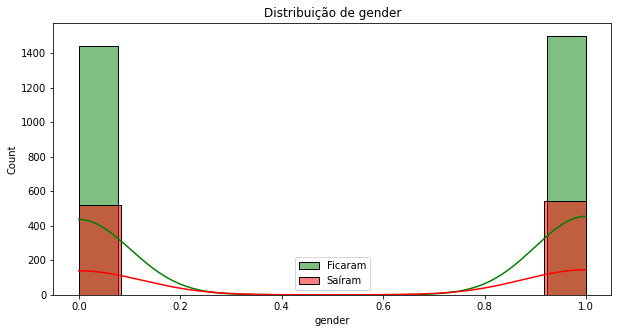

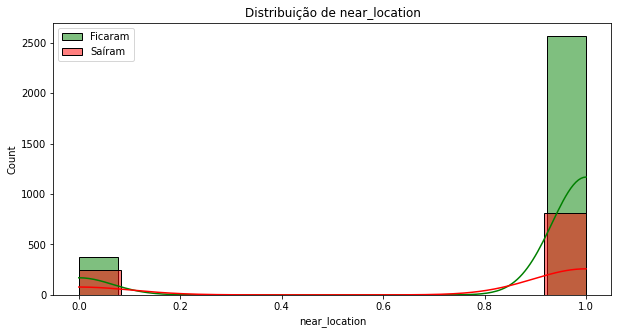

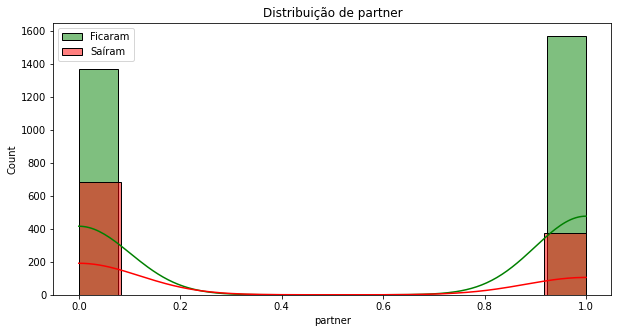

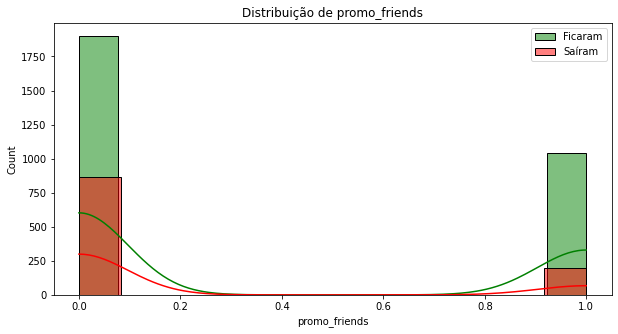

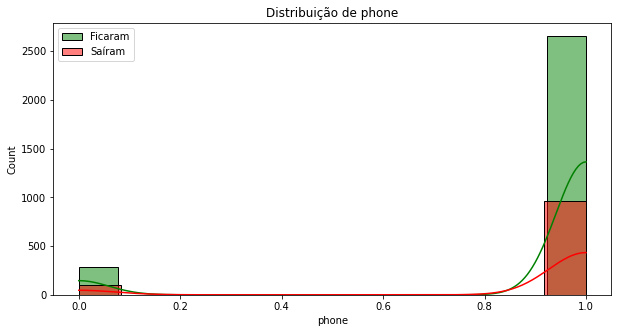

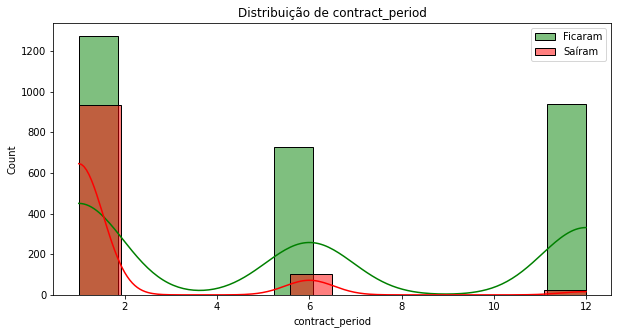

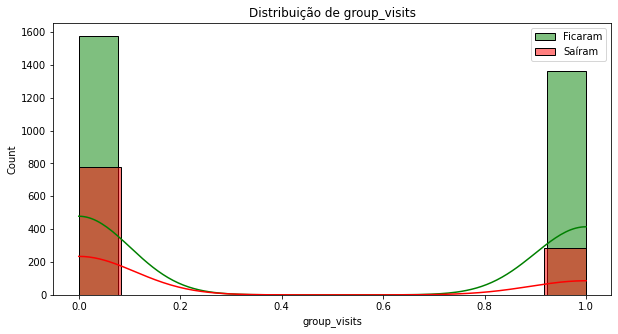

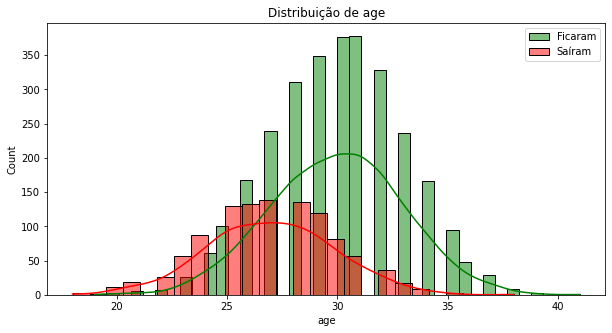

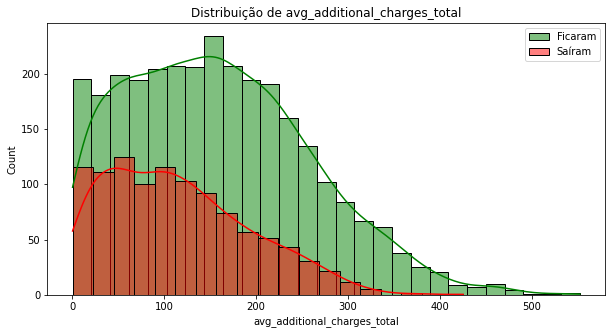

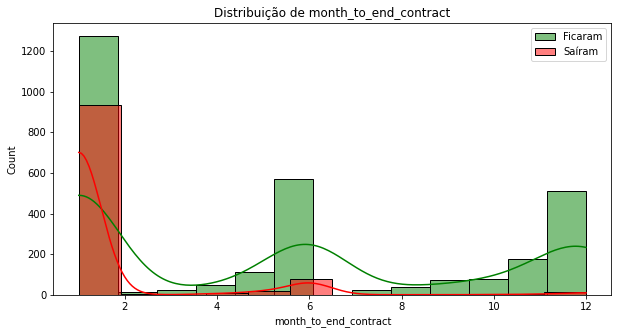

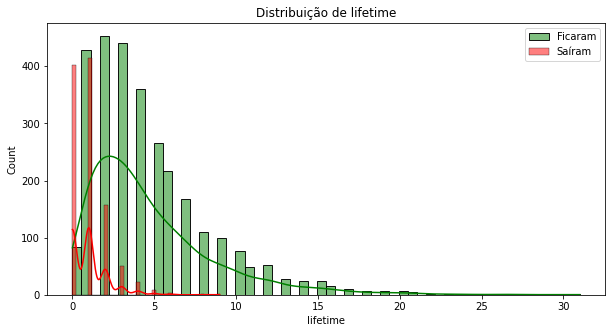

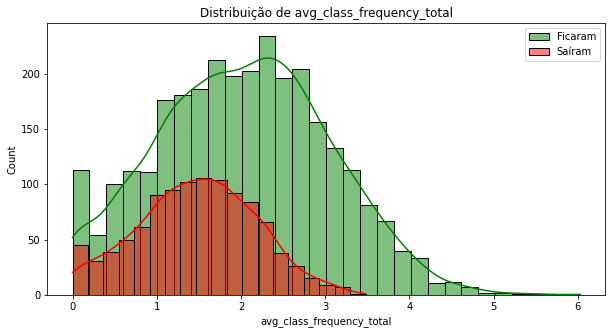

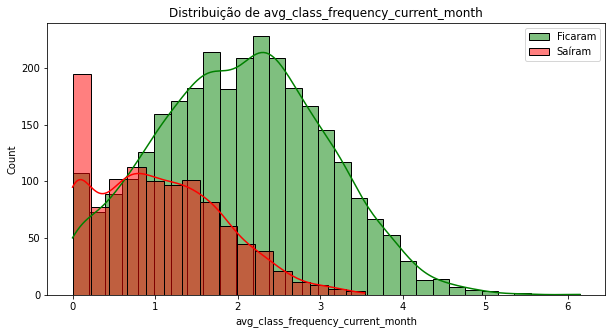

In [12]:
# Histogramas de barra para aqueles que saíram (churn=1) e aqueles que ficaram (churn=0)
features = df.columns[:-1]  # Excluindo a coluna 'churn' para histogramas

for feature in features:
    plt.figure(figsize=(10, 5))
    
    sns.histplot(df[df['churn'] == 0][feature], label='Ficaram', kde=True, color='green')
    sns.histplot(df[df['churn'] == 1][feature], label='Saíram', kde=True, color='red')
    
    plt.legend()
    plt.title(f"Distribuição de {feature}")
    plt.show()

**Conclusão**

* Para vender temos que o número de pessoas que ficaram e saíram para cada gênero é muito parecido
* A distribuição de pessoas que moram perto é maior de pessoas que ficam na academia, apesar de que o churro para ambos é parecido
* Para parceiros de treino, parece que ter um parceiro de treino influência no churn, pois pode-se ver que há mais saída de pessoas que não possuem parceiros
* As promos de convite de amigos parece surtir efeito no churro
* As pessoas que estão menos tempo na academia tendem a ter maior churn no começo. Após um longo período de contrato elas tendem menos a deixar a academia, ou seja, fideliza o cliente com o tempo.
* Pessoas que não estão em group_visits saem mais do que as que não saem
* Quanto maior a idade do público menor o churn. A idade com maior pessoas na academia e menor churn é de meia idade entre 30 a 40 anos. Ao envelhecer o churn cai quase para 0, pois pode ser que o poder aquisitivo seja um ponto importante.
* Cobranças adicionais não parecem alterar muito as pessoas que ficam ou saem, a distribuição é muito parecida.
* Pessoas com contrato perto a acabar tendem a ter maior churn. Ou seja, contratos com maior tempo tem menor desistência
* Como observado anteriormente, quanto maior o tempo de contrato com a academia menor a tendencia de desistir.
* A frequência na academia pode ser importante, pessoas com maior frequência semanal tendem a desistir menos. Pessoas que participam uma média de 3 dias tem tendencia a sair.
* Mensalmente pode-se observar o mesmo, quando o cliente não vai a academia ele tende a ter um churn.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Gráficos e conclusões ficaram exclentes
</div>

### Matriz de Correlação

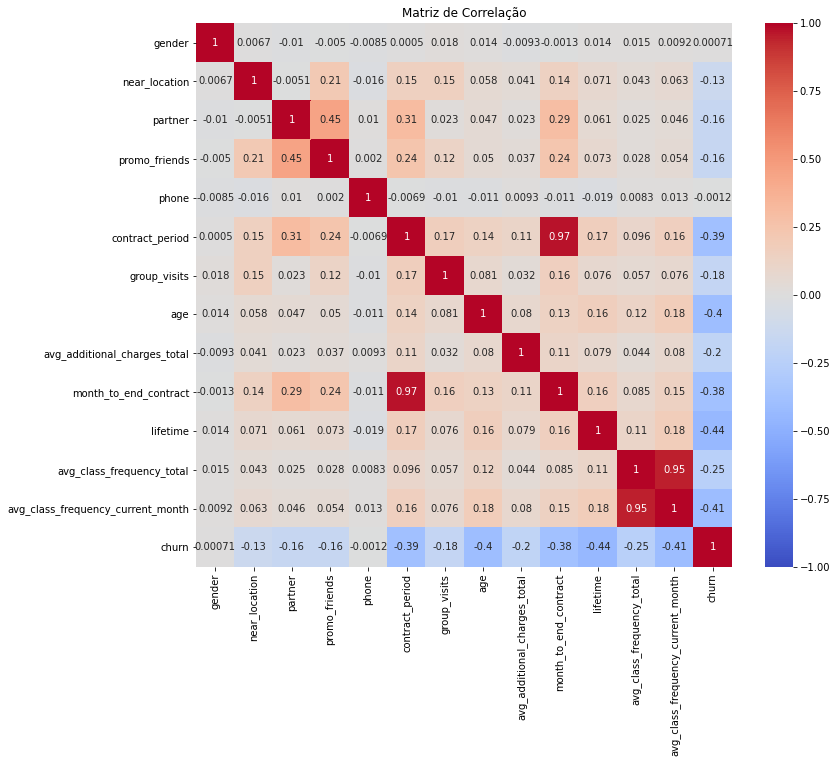

In [14]:
# Gerando matriz
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

**Principais Conclusões a partir das Correlações:**

1. **Fatores Relacionados à Retenção**: `contract_period`, `age`, `lifetime`, e `avg_class_frequency_current_month` têm correlações negativas significativas com `churn`. Isso sugere que clientes com contratos mais longos, mais velhos, com maior tempo de vida (duração de associação com o ginásio) e que visitam o ginásio com frequência no último mês são menos propensos a sair.

2. **Promoções e Parcerias**: A correlação entre `partner` e `promo_friends` é positiva e significativa (0.451960), o que indica que os clientes que são parceiros têm maior probabilidade de se inscrever através da promoção "traga um amigo".

3. **Contrato e Compromisso**: `contract_period` e `month_to_end_contract` têm uma alta correlação positiva de 0.973064, indicando que aqueles com períodos de contrato mais longos geralmente têm mais meses restantes em seus contratos.

4. **Visitas em Grupo**: `group_visits` e `churn` têm uma correlação negativa de -0.175325, o que sugere que os clientes que frequentam sessões de grupo têm uma probabilidade ligeiramente menor de sair.

5. **Despesas Adicionais**: Uma correlação negativa de -0.198697 entre `avg_additional_charges_total` e `churn` sugere que clientes que gastam mais em serviços adicionais têm menor probabilidade de sair.

**Conclusão Geral:**

A rotatividade de clientes está mais fortemente influenciada pelo período de contrato, idade, frequência de visitas e gastos adicionais. Estratégias que focam em prolongar o período de contrato, incentivar frequentes visitas ao ginásio e promover a compra de serviços adicionais podem ser eficazes na retenção de clientes. Além disso, atenção especial pode ser dada aos clientes mais jovens, uma vez que a idade foi identificada como um fator importante de retenção.

## Modelo de Rotatividade de cliente

Construiremos um modelo de classificação binária para nossos clientes onde a variável objetivo será a saída de usuários do mês seguinte.
* Dividiremos os dados de treinamento e validação em dois conjuntos usando a função train_test_split().
* Treinaremos o modelo no conjunto com dois métodos:
    * regressão logística
    * floresta aleatória
* Avaliaremos acurácia, precisão e sensibilidade para ambos os modelos usando dados de validação. Usá-los-emos para comparar os modelos.

In [16]:
# mostrando a df novamente
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


Iremos importar nossas bibliotecas necessárias para utilizar esse tipo de análise e criação de modelo de previsão.

Iremos utilizar da biblioteca do Sklearn para tal.

In [17]:
# importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Divisão dos dados

Os dados são divididos em conjuntos de treinamento e validação para permitir que o modelo seja treinado em uma parte dos dados e validado/testado em uma parte separada. Isso nos ajuda a avaliar a performance do modelo em dados não vistos anteriormente.

In [18]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### Treinando os modelos

Dois modelos de aprendizado de máquina são treinados:

* Regressão Logística: É um modelo estatístico que é usado para prever a probabilidade de uma variável dependente categórica.
* Floresta Aleatória: É um modelo baseado em árvores de decisão e é usado para classificação e regressão. É um agregado de muitas árvores de decisão.

In [19]:
# Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Floresta Aleatória
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Avaliando a acurácia de cada um dos modelos para comparação

A performance dos modelos treinados é avaliada usando três métricas:

* Acurácia: A proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.
* Precisão: Dos positivos que previmos, quantos de fato eram positivos.
* Sensibilidade (Recall): Dos verdadeiros positivos, quantos previmos corretamente.

In [20]:
# Previsões
y_pred_log_reg = log_reg.predict(X_valid)
y_pred_random_forest = random_forest.predict(X_valid)

# Métricas para Regressão Logística
accuracy_log_reg = accuracy_score(y_valid, y_pred_log_reg)
precision_log_reg = precision_score(y_valid, y_pred_log_reg)
recall_log_reg = recall_score(y_valid, y_pred_log_reg)

# Métricas para Fbloresta Aleatória
accuracy_random_forest = accuracy_score(y_valid, y_pred_random_forest)
precision_random_forest = precision_score(y_valid, y_pred_random_forest)
recall_random_forest = recall_score(y_valid, y_pred_random_forest)

print("Regressão Logística:")
print(f"Acurácia: {accuracy_log_reg:.2f}, Precisão: {precision_log_reg:.2f}, Sensibilidade: {recall_log_reg:.2f}")
print("\nFloresta Aleatória:")
print(f"Acurácia: {accuracy_random_forest:.2f}, Precisão: {precision_random_forest:.2f}, Sensibilidade: {recall_random_forest:.2f}")


Regressão Logística:
Acurácia: 0.92, Precisão: 0.87, Sensibilidade: 0.78

Floresta Aleatória:
Acurácia: 0.91, Precisão: 0.85, Sensibilidade: 0.78


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você não calibrou hiperparãmetros, isso é fundamental. Podemos usar GridSearchCV para esse fim
</div>

### Conclusão - Comparação entre os modelos

Com base nas métricas calculadas no Passo 5, determinamos qual dos modelos tem um desempenho melhor. A escolha do modelo "melhor" pode depender das necessidades específicas do projeto: em alguns casos, pode-se priorizar a precisão, enquanto em outros, a sensibilidade pode ser mais crucial.

In [21]:
# Comparando acurácia
if accuracy_log_reg > accuracy_random_forest:
    print("Regressão Logística rendeu melhores resultados em termos de acurácia.")
elif accuracy_log_reg < accuracy_random_forest:
    print("Floresta Aleatória rendeu melhores resultados em termos de acurácia.")
else:
    print("Ambos os modelos têm acurácias iguais.")

# Comparando precisão
if precision_log_reg > precision_random_forest:
    print("Regressão Logística rendeu melhores resultados em termos de precisão.")
elif precision_log_reg < precision_random_forest:
    print("Floresta Aleatória rendeu melhores resultados em termos de precisão.")
else:
    print("Ambos os modelos têm precisões iguais.")

# Comparando sensibilidade (recall)
if recall_log_reg > recall_random_forest:
    print("Regressão Logística rendeu melhores resultados em termos de sensibilidade.")
elif recall_log_reg < recall_random_forest:
    print("Floresta Aleatória rendeu melhores resultados em termos de sensibilidade.")
else:
    print("Ambos os modelos têm sensibilidades iguais.")

Regressão Logística rendeu melhores resultados em termos de acurácia.
Regressão Logística rendeu melhores resultados em termos de precisão.
Ambos os modelos têm sensibilidades iguais.


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Acredito que Reg Logística se mostrou melhor porque não houve calibração de hiperparâmetros.
</div>

**Conclusão**

Com base nos resultados gerados a partir do seu conjunto de dados:

Ambos os modelos de Regressão Logística e Floresta Aleatória demonstraram performances notáveis em classificar os dados. A Regressão Logística, em particular, superou a Floresta Aleatória em termos de acurácia e precisão, alcançando 0,92 e 0,87, respectivamente, comparado a 0,91 e 0,85 da Floresta Aleatória.

Entretanto, é importante notar que, em termos de sensibilidade (ou recall), ambos os modelos se saíram igualmente bem, atingindo uma taxa de 0,78. Isso sugere que os dois modelos são igualmente capazes de identificar corretamente a proporção de verdadeiros positivos em relação ao total de positivos reais.

Concluindo, a Regressão Logística pode ser a escolha preferencial para este conjunto de dados específico, considerando sua superioridade em acurácia e precisão. Contudo, a Floresta Aleatória não fica muito atrás e, em contextos onde a sensibilidade é uma métrica crucial, ambos os modelos são igualmente válidos. 

Neste caso, devido a maior acurácia e precisão iremos recomendar o uso da **regressão logística**

## Agrupamento de clientes - Clusterização


1. Definiremos ao lado colunas com dados sobre rotatividade e identificaremos agrupamentos do objeto (cliente).
2. Padronizaremos os dados.
3. Utilizaremos a função linkage() para construir a matriz das distâncias baseada na matriz de características padronizada e construiremos um dendrograma. Notem: renderizar o dendrograma poderá demorar um tempo! Usaremos o gráfico resultante para estimar o número de agrupamentos que poderemos destacar.
4. Treinaremos o modelo de agrupamento com o algoritmo K-means e preveremos agrupamentos de clientes. (Deixaremos que o número de agrupamentos seja n=5, para que seja fácil comparar nossos resultados com os de outros estudantes. No entanto, na vida real, ninguém nos dará essas dicas, então teremos que decidir baseados nos gráficos das etapas anteriores.)
5. Olharemos para os valores médios das características para agrupamentos.
6. Faremos distribuições de características para os agrupamentos. Notaremos alguma coisa?
7. Calcularemos a taxa de rotatividade para cada agrupamento (usando o método groupby()). 

Vamos entender se:
* Eles diferirão em termos de taxa de rotatividade? 
* Quais agrupamentos serão propensos a sair, e quais serão leais?

In [22]:
# mostrando a df
df.head(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


In [23]:
# importando biblioteca necessária
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

### Padronização dos Dados

A padronização é necessária porque os algoritmos de clustering, como o K-means, são sensíveis à escala.

In [24]:
# padronização de dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['churn']))

### Construção da Matriz das Distâncias e Dendrograma

Para construir um dendrograma, usamos a função linkage(). O dendrograma pode ajudar a visualizar e escolher um número apropriado de clusters.

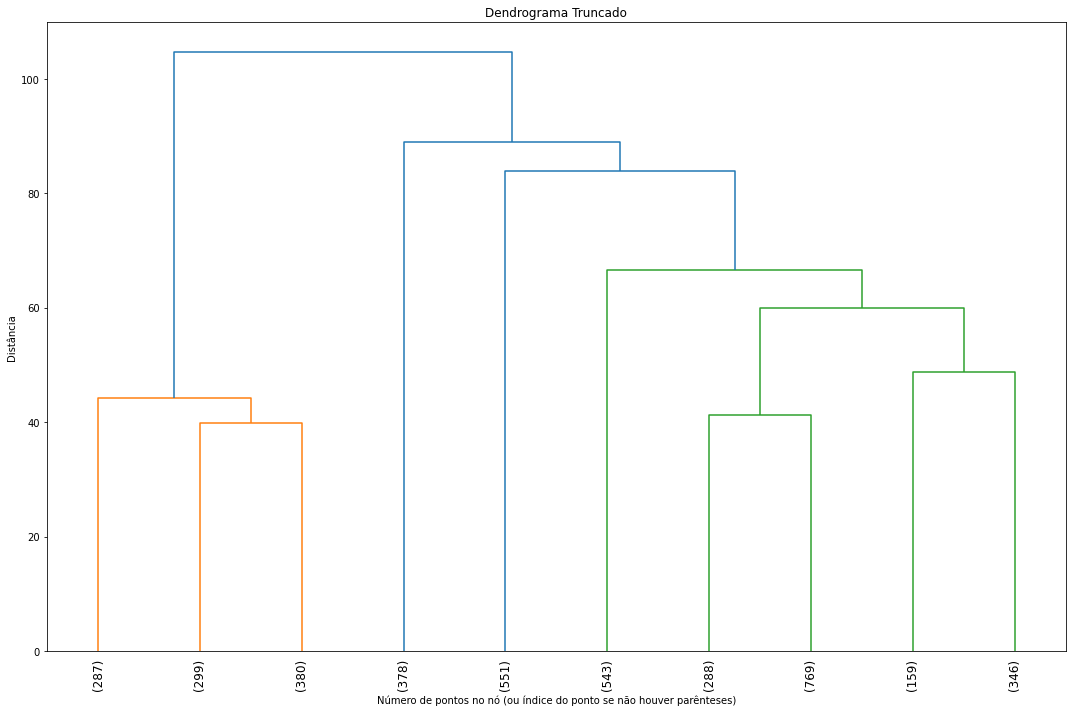

In [30]:
# criando o linked
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(15, 10))

# Truncando o dendrograma para mostrar apenas os últimos 10 ramos fundidos
dend = dendrogram(linked, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_rotation=90.)

plt.title('Dendrograma Truncado')
plt.xlabel('Número de pontos no nó (ou índice do ponto se não houver parênteses)')
plt.ylabel('Distância')
plt.tight_layout()  # Garante que tudo esteja bem ajustado e visível
plt.show()

**Conclusão**

Utilizando o método do ponto de corte iremos definir o número de clusters que iremos utilizar para nossa classificação e separação entre grupos.

Ao observar o Dendograma podemos observar que as maiores distancias de ramos, iremos utilizar uma linha imaginária horizontal e cortar o gráfico na dist6ancia de 50. Nessa distância teremos que o número de nós será de 6, ou seja, teremos 6 clusters em nossos dados.

### Treinamento do Modelo K-means

Vamos treinar o modelo K-means usando n=5 clusters.

In [33]:
# começando o processo de clusterização
kmeans = KMeans(n_clusters=6)
df['cluster'] = kmeans.fit_predict(df_scaled)

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O número de clusters é um hiperparâmetro e geralmente usamos o método do cotovelo (elbow method ) para defini-lo.
</div>

### Analisando os Valores Médios dos Clusters
Para ter uma ideia da característica de cada cluster, olharemos para os valores médios:

In [34]:
# valores médios para cada cluster
cluster_means = df.groupby('cluster').mean()
cluster_means

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.484496,1.000000,0.237403,0.014535,1.000000,1.995155,0.326550,28.205426,131.363216,1.910853,2.458333,1.305192,1.074515,0.512597
1,0.500595,0.946492,0.747919,0.495838,1.000000,11.885850,0.551724,29.953627,163.537149,10.844233,4.715815,2.013672,2.005481,0.021403
2,0.523438,0.861979,0.471354,0.307292,0.000000,4.768229,0.424479,29.286458,143.989334,4.466146,3.906250,1.839546,1.708522,0.268229
3,0.585075,0.962687,0.283582,0.100000,0.997015,2.888060,0.477612,30.337313,167.045293,2.638806,5.076119,2.945347,2.948679,0.053731
4,0.495968,0.000000,0.469758,0.080645,1.000000,2.288306,0.217742,28.445565,134.251178,2.143145,2.758065,1.639170,1.452160,0.451613
5,0.487002,1.000000,0.812825,1.000000,1.000000,3.065858,0.445407,29.041594,140.160304,2.864818,3.686308,1.703337,1.595736,0.261698


**Conclusão**

Com base nos valores médios dos clusters fornecidos, podemos inferir as seguintes conclusões:

1. **Proximidade ao local**:
    - Os clientes do cluster 0, 1, 3, 5 estão muito próximos da localização (valores próximos a 1), enquanto os clientes do cluster 2 estão razoavelmente próximos. Os clientes do cluster 4 estão claramente longe da localização (valor 0).

2. **Parcerias**:
    - O cluster 1 e 5 mostram uma alta tendência a ter parceiros (valores >0.7), enquanto os clusters 0, 2, 3 e 4 apresentam menor tendência a isso.

3. **Referências de amigos**:
    - O cluster 5 se destaca com todos os seus membros tendo sido trazidos por meio de promoções com amigos (valor 1). O cluster 1 segue com quase metade dos seus membros tendo sido referenciados. Os outros clusters têm valores bem mais baixos para essa métrica.

4. **Telefone**:
    - Os clusters 0, 1, 3, 4 e 5 têm um registro completo de telefone (valor 1). O cluster 2, por outro lado, não tem qualquer registro de telefone (valor 0).

5. **Duração do contrato**:
    - O cluster 1 tem, em média, os contratos mais longos (quase 12 meses), seguido dos clusters 2, 5 e 3. Os clusters 0 e 4 têm os contratos mais curtos.

6. **Visitas em grupo**:
    - O cluster 1 tem a maior média de visitas em grupo, seguido pelos clusters 3, 5 e 2. Os clusters 0 e 4 têm as menores médias.

7. **Idade**:
    - Os clientes no cluster 3 são, em média, os mais velhos, enquanto os do cluster 0 são os mais jovens.

8. **Gastos adicionais**:
    - O cluster 3 tem o maior gasto adicional médio, seguido pelo cluster 1. Os clusters 0 e 4 têm os menores gastos.

9. **Meses até o fim do contrato**:
    - Segue um padrão semelhante à duração do contrato. O cluster 1 tem os contratos mais longos para acabar, enquanto o cluster 0 tem os mais curtos.

10. **Vida útil**:
    - O cluster 3 tem a vida útil média mais longa, seguido pelo cluster 1. O cluster 0 tem a vida útil média mais curta.

11. **Frequência de aulas (total e do mês atual)**:
    - O cluster 3 frequenta as aulas com mais regularidade, tanto em média total quanto no mês atual. O cluster 0 tem a menor frequência média.

12. **Desistência (churn)**:
    - O cluster 1 tem a menor taxa de desistência, indicando que seus membros são mais leais. Em contraste, o cluster 0 tem a maior taxa de desistência.

**Observações gerais**:

- O cluster 1 representa os clientes mais valiosos: estão próximos da localização, têm contratos mais longos, frequentam mais aulas e gastam mais. Eles também têm a menor taxa de desistência.
- O cluster 0 representa possivelmente os clientes mais "em risco", pois têm contratos mais curtos, frequência de aula mais baixa, gastos menores e a maior taxa de desistência.
- O cluster 3 tem características mistas. Eles são mais velhos, têm gastos elevados e uma frequência alta de aulas, mas seus contratos são mais curtos em comparação com o cluster 1.
- O cluster 4 se destaca por sua distância da localização.
- O cluster 5 tem uma alta taxa de referências por amigos e parcerias, o que pode indicar uma boa base de clientes engajados que trazem novos membros.

### Distribuição de Características para os Agrupamentos
Vamos visualizar a distribuição de algumas características chave para entender melhor cada cluster.

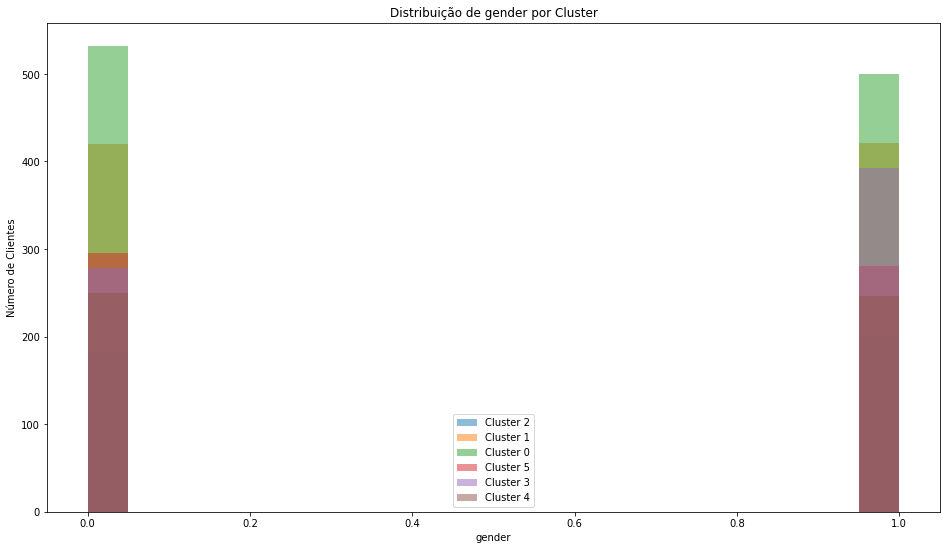

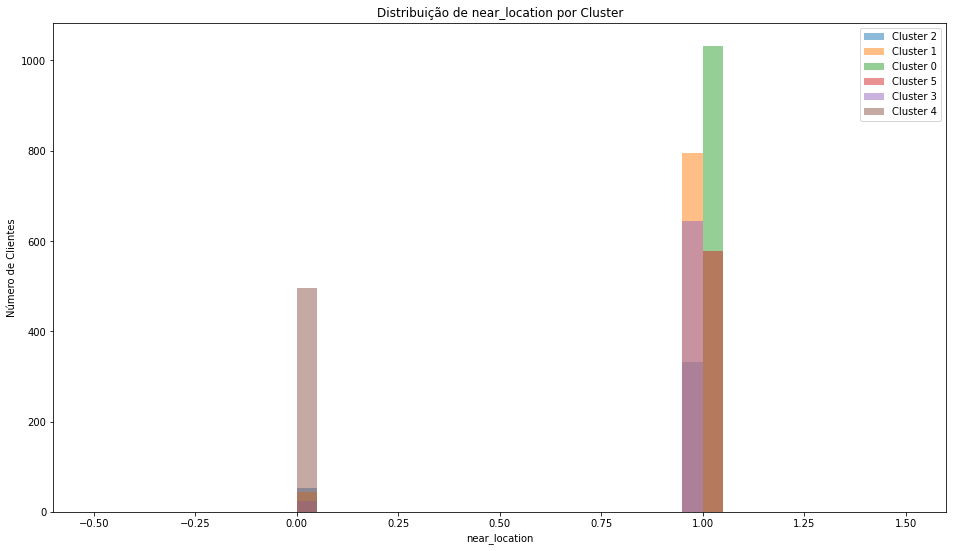

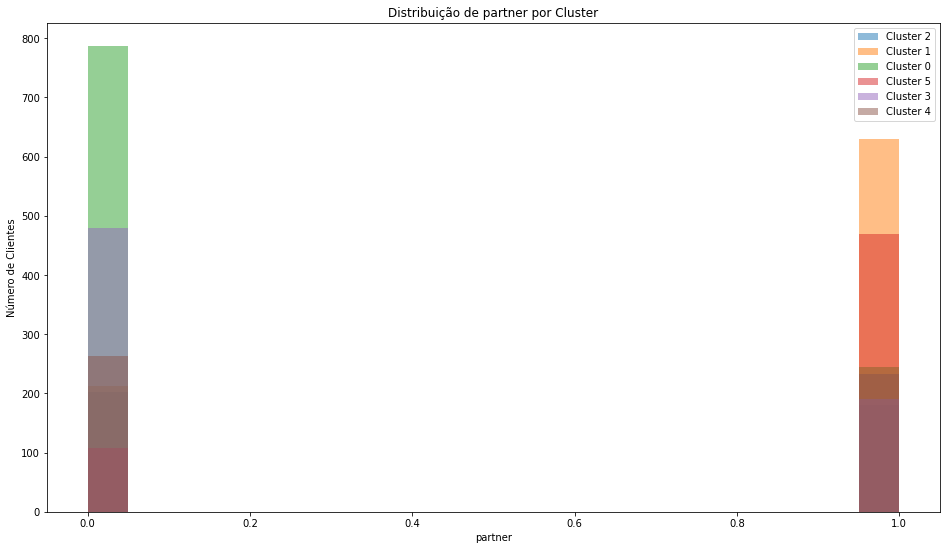

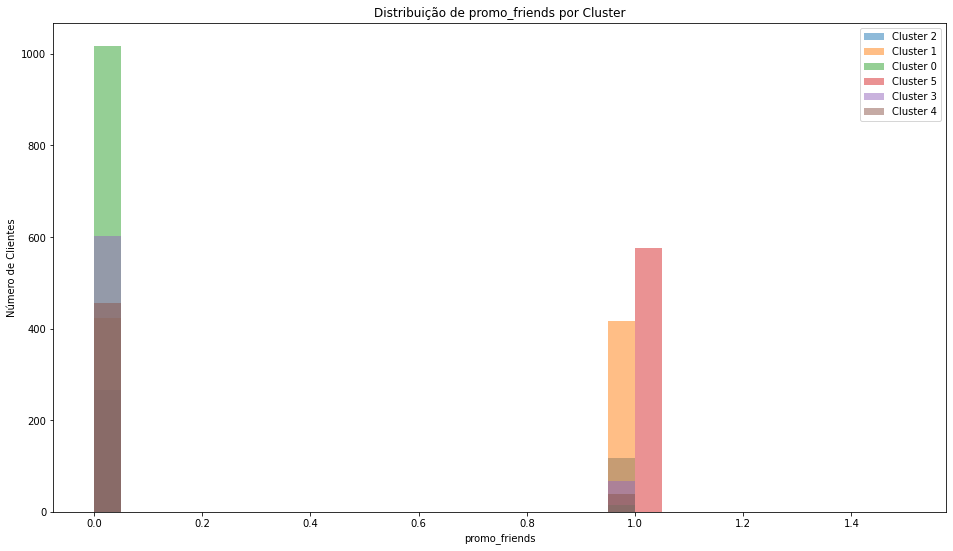

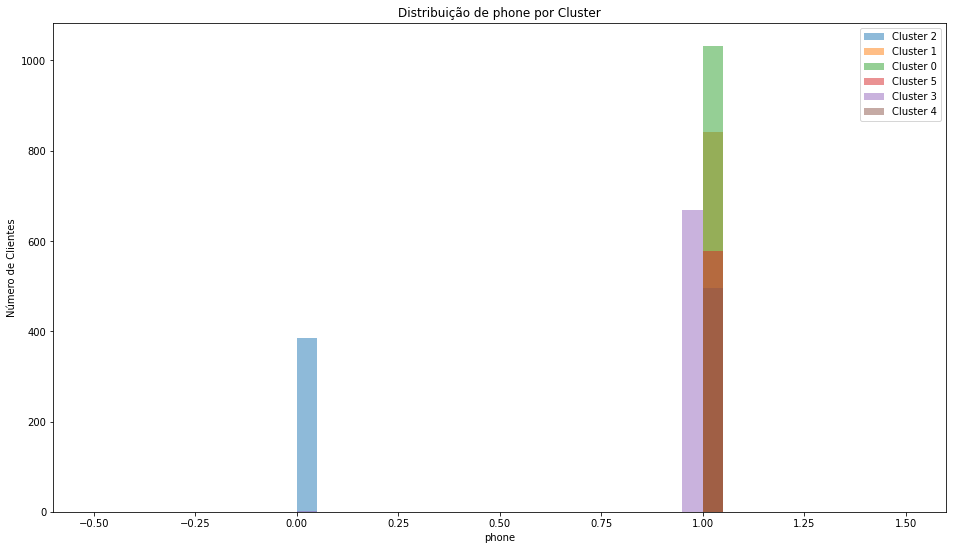

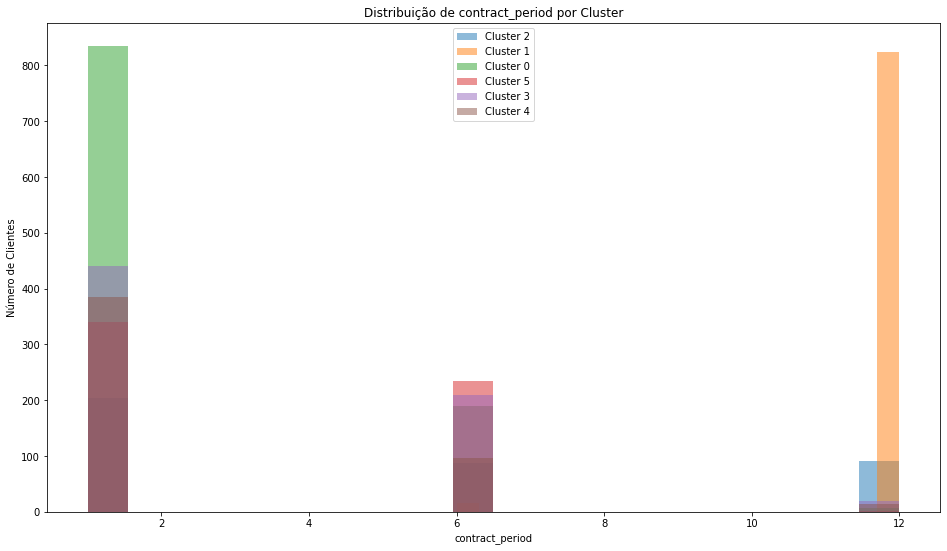

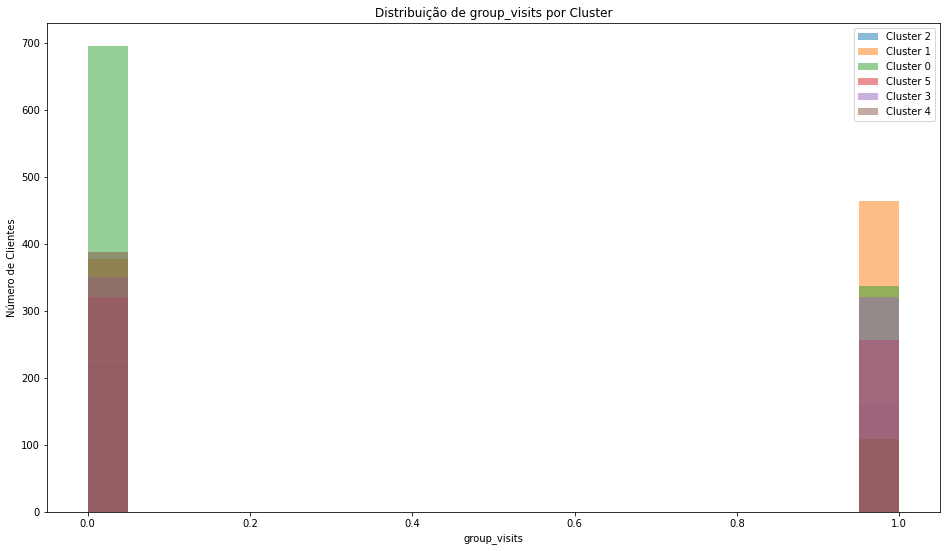

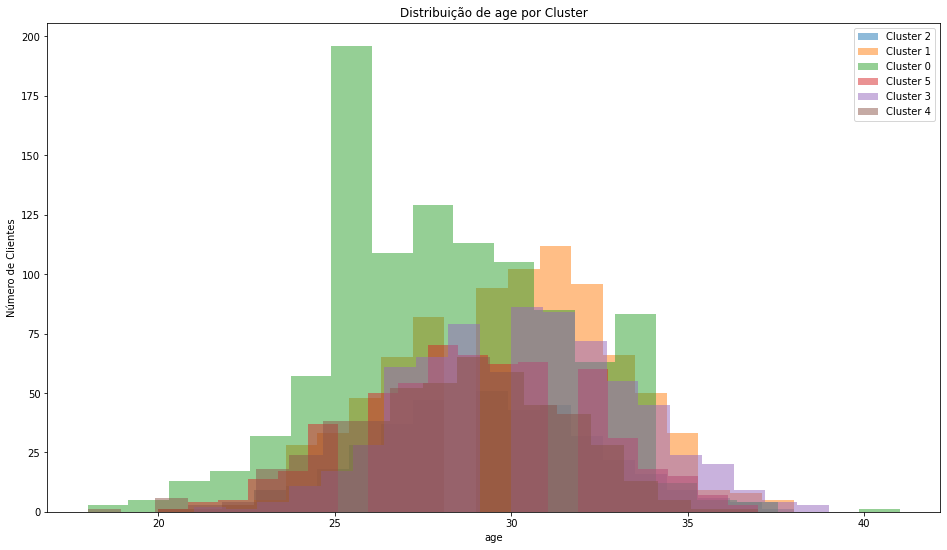

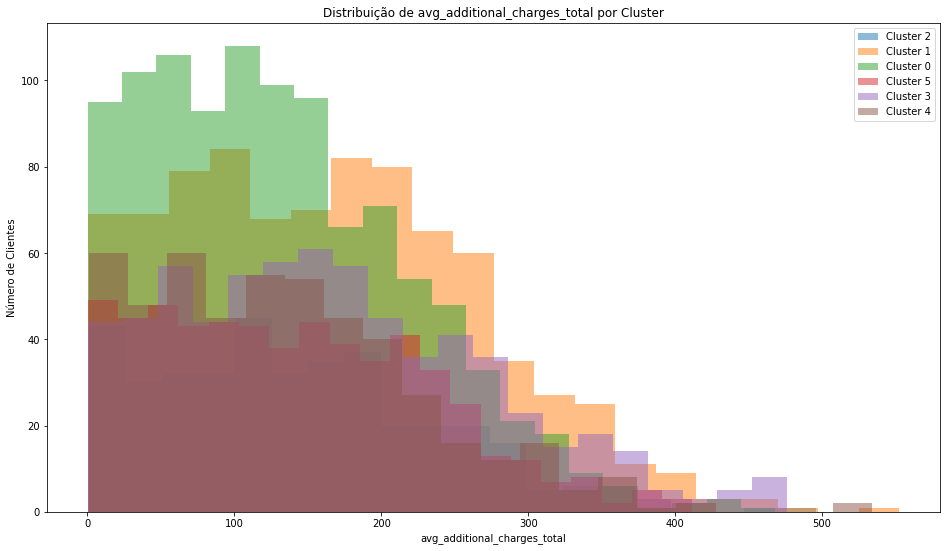

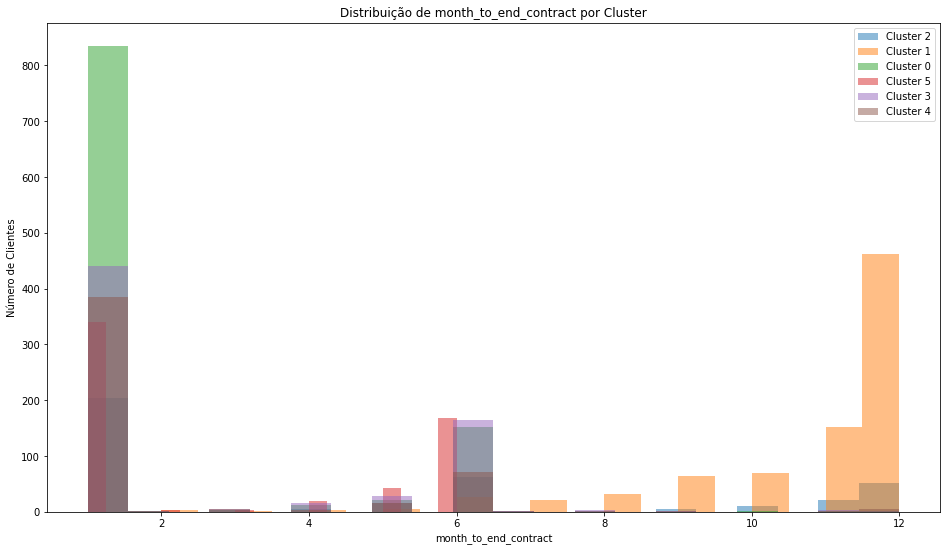

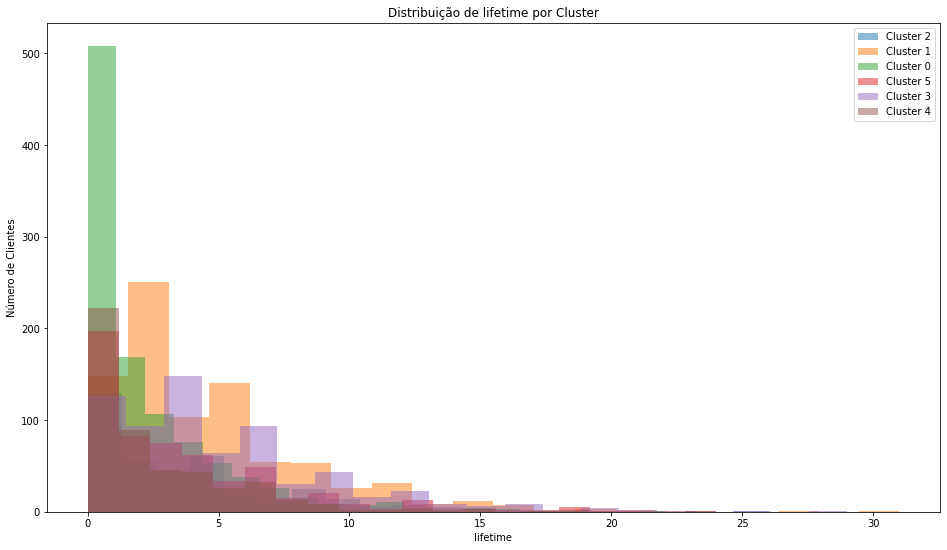

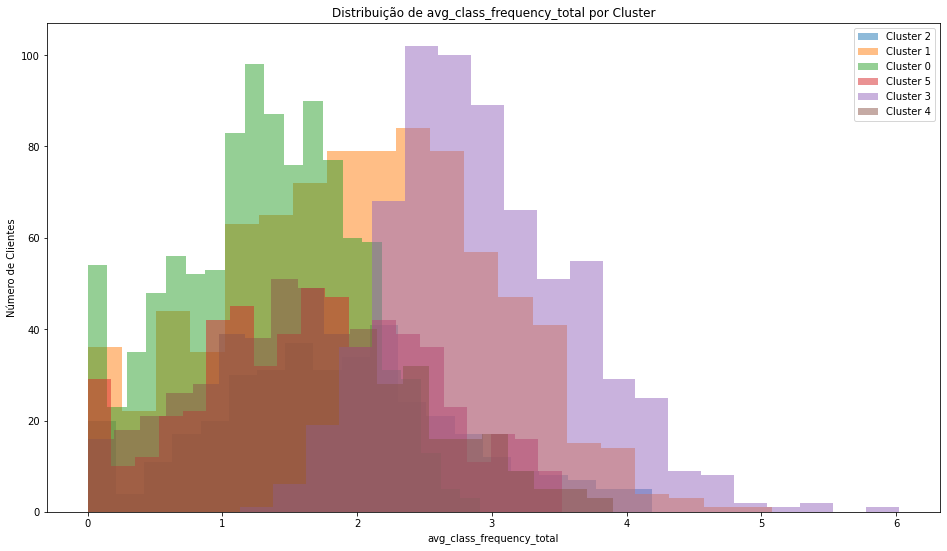

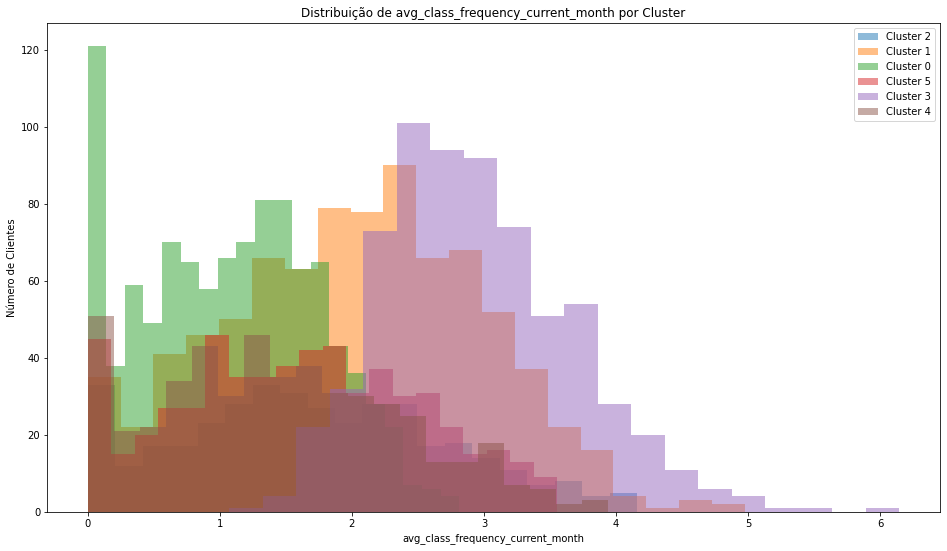

In [35]:
# Plotando os gráficos de caracteristicas
features = df.columns.drop(['cluster', 'churn'])  # Retiramos 'cluster' e 'churn' para não incluir na visualização

for feature in features:
    plt.figure(figsize=(16, 9))
    
    for cluster in df['cluster'].unique():
        plt.hist(df[df['cluster'] == cluster][feature], alpha=0.5, bins=20, label=f'Cluster {cluster}')

    plt.title(f'Distribuição de {feature} por Cluster')
    plt.xlabel(feature)
    plt.ylabel('Número de Clientes')
    plt.legend()
    plt.show()

**Conclusão**

* Para gêneros os clusters são parecidos
* Os clusters 0, 3,  e 4 estão mais presentes em clientes sem parceiros de treino. Nos outros, com parceiros para treino.
* Os clusters 0,4, não tem promo Friends os outros sim.
* O clusters 1 tem predominância para clientes com maior tempo de contrato, já o cluster 0 e 3 menos temp.
* Clientes do grupo 0 e 3 não tem visitas em grupos.
* A distribuição de idades é muito parecida, apesar de que o grupo 0 tem mais jovens.
* O grupo 0 tem menos charges.

### Calculando a Taxa de Rotatividade para Cada Agrupamento

Clusters com alta taxa de rotatividade são aqueles com clientes mais propensos a sair, enquanto clusters com baixa taxa de rotatividade têm clientes mais leais.

In [36]:
churn_rate = df.groupby('cluster')['churn'].mean()
churn_rate

cluster
0    0.512597
1    0.021403
2    0.268229
3    0.053731
4    0.451613
5    0.261698
Name: churn, dtype: float64

**Conclusão Geral:**

Os clusters permitem uma visão multifacetada dos clientes, evidenciando a diversidade de suas características e preferências. Uma rápida análise das médias dos clusters indica diferenças notáveis em vários aspectos:

- **Proximidade à localização** desempenha um papel crucial na associação de um cliente. Aqueles que estão próximos à localização (clusters 0, 1, 3, 5) podem ter maior conveniência, enquanto os do cluster 4, que estão longe, podem enfrentar barreiras logísticas.

- **Parcerias e Promoções entre Amigos** demonstram a força das redes sociais e recomendações. Clusters como o 1 e 5 têm clientes mais inclinados a treinar com parceiros ou se beneficiar de promoções entre amigos. Por outro lado, os clusters 0, 3 e 4 parecem menos inclinados a essas ofertas.

- A **duração do contrato** mostra uma ligação com o comprometimento do cliente. O cluster 1 mostra um comprometimento claro com contratos mais longos, enquanto o cluster 0 e 4 têm durações mais curtas.

- A **idade** pode influenciar as preferências de treino e o comprometimento. Enquanto o cluster 3 abriga os clientes mais velhos, o cluster 0 é predominantemente mais jovem.

- **Despesas adicionais** e **frequência de aulas** podem indicar o nível de envolvimento e satisfação do cliente. O cluster 3, por exemplo, exibe uma alta frequência e gastos, apontando para um compromisso sólido.

- No entanto, é fundamental notar o **churn**. O cluster 1, apesar de suas características positivas, tem a menor taxa de desistência, mostrando fidelidade. Em contraste, o cluster 0, com seu perfil mais jovem e contratos mais curtos, mostra a maior taxa de desistência, sinalizando uma área que precisa de atenção.

Concluindo, a estratificação dos clientes em clusters fornece insights valiosos sobre suas características e comportamentos. Ações direcionadas, como ofertas personalizadas ou programas de engajamento, podem ser formuladas com base nesses insights para melhorar a retenção e a satisfação do cliente.

## Recomendações básicas sobre trabalhar com clientes

**Conclusões e Recomendações:**

1. **Promoções e Parcerias**:
    - **Conclusão**: A promoção "traga um amigo" e as parcerias são fatores críticos de retenção.
    - **Recomendação**: Continuar e possivelmente intensificar a promoção "traga um amigo" e as parcerias, oferecendo incentivos adicionais para aqueles que trouxerem mais amigos ou renovarem parcerias.

2. **Localização**:
    - **Conclusão**: Clientes que moram mais perto do ginásio têm uma maior taxa de retenção.
    - **Recomendação**: Investir em marketing geotargeting para atrair moradores próximos e considerar abrir filiais em áreas com alta densidade de potenciais clientes.

3. **Comprometimento e Frequência**:
    - **Conclusão**: O período do contrato e a frequência com que os clientes frequentam o ginásio são cruciais para a retenção.
    - **Recomendação**: Oferecer descontos ou pacotes adicionais para contratos de longo prazo e incentivar clientes a manter uma rotina de treino regular, talvez através de desafios mensais ou recompensas por frequência.

4. **Segmentação de Clientes**:
    - **Conclusão**: Existem segmentos distintos de clientes com características e comportamentos variados.
    - **Recomendação**: Personalizar a comunicação e as ofertas para cada cluster. Por exemplo, para o cluster 0 ("em risco"), pode-se oferecer sessões de treinamento gratuitas ou promoções exclusivas para incentivá-los a ficar. Para o cluster 1 ("clientes valiosos"), pode-se introduzir programas de fidelidade ou eventos exclusivos para agradecê-los por sua lealdade.

5. **Atenção à Juventude**:
    - **Conclusão**: Clientes mais jovens tendem a ter taxas de churn mais altas.
    - **Recomendação**: Introduzir classes ou eventos específicos para jovens, oferecer descontos estudantis, e talvez criar uma campanha de marketing direcionada para este grupo demográfico.

6. **Sessões de Grupo**:
    - **Conclusão**: Frequentar sessões de grupo está associado a uma maior retenção.
    - **Recomendação**: Aumentar a variedade e a frequência de sessões de grupo, promovendo-as ativamente e talvez oferecendo a primeira aula de grupo gratuita para novos membros.

7. **Gastos Adicionais**:
    - **Conclusão**: Aqueles que gastam mais em serviços adicionais tendem a ficar mais.
    - **Recomendação**: Promover serviços adicionais, oferecendo pacotes ou descontos para compras em bundle.

A adoção destas estratégias e recomendações deve ser monitorada de perto para ajustar e otimizar com base nos resultados obtidos. É também fundamental manter um diálogo aberto com os clientes para entender suas necessidades e expectativas em evolução.


Além disso, é interessante notar que:

**Análise de Rotatividade**:
- **Gênero**: Não influencia significativamente a rotatividade.
- **Localização Próxima**: Morar perto aumenta as chances de permanecer.
- **Parceiro**: Parceria com o ginásio parece influenciar positivamente a retenção.
- **Promoção de Amigos**: Aqueles que vieram através da promoção tendem a ficar mais.
- **Telefone**: Não apresenta diferença significativa entre os grupos.
- **Período de Contrato**: Aqueles com contratos mais longos tendem a permanecer.
- **Visitas em Grupo**: Frequência em sessões de grupo é um fator de retenção.
- **Idade**: Clientes mais velhos são menos propensos a sair.
- **Despesas Adicionais**: Aqueles que gastam mais em serviços extras tendem a permanecer.
- **Tempo de Vida**: Aqueles que permanecem por mais tempo são menos propensos a sair.
- **Frequência Média de Aulas**: Frequência maior está correlacionada com menor rotatividade.

**Recomendações**:

1. **Estratégias de Retenção Local**: Encoraje clientes que moram ou trabalham perto a aproveitar a conveniência do ginásio.
2. **Promoções de Parceria e "Traga um Amigo"**: Dê continuidade e até reforce estas campanhas, pois têm um impacto significativo na retenção.
3. **Sessões em Grupo**: Promova mais aulas em grupo, visto que elas têm um efeito positivo na retenção.
4. **Programas de Lealdade baseados em Despesas**: Ofereça recompensas ou descontos para clientes que gastam mais no ginásio.
5. **Atenção a Novos Membros**: Implemente programas de integração para novos membros, visto que o tempo de vida inicial é crítico para retenção.